 #  TECHNO HACKS EDUTECH- Virtual Internship 2023

# Name : Sanjay Vijay Junare

# Task 2 :- Social media sentiment analysis

Use a dataset that includes information about Twitter,it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for airlines

In [6]:
!pip install contractions
!pip install missingno
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re, string, unicodedata                          
import contractions                                     
from bs4 import BeautifulSoup                           
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [54]:
df = pd.read_csv('/Users/sanjayjunare/Downloads/archive 2/Tweets.csv')

In [55]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [56]:
texts = [[word.lower() for word in text.split()] for text in df]

In [57]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# **Observations:**

There are 15 columns in the dataset.
Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing.
Most columns in the dataset are of object type.
airline_sentiment is our dependent / target variable.
text column is our independent variable that we will use for analysis.
All other columns will be dropped at a later stage.

In [59]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [60]:
df.isnull().sum() / len(df) * 100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

<Axes: >

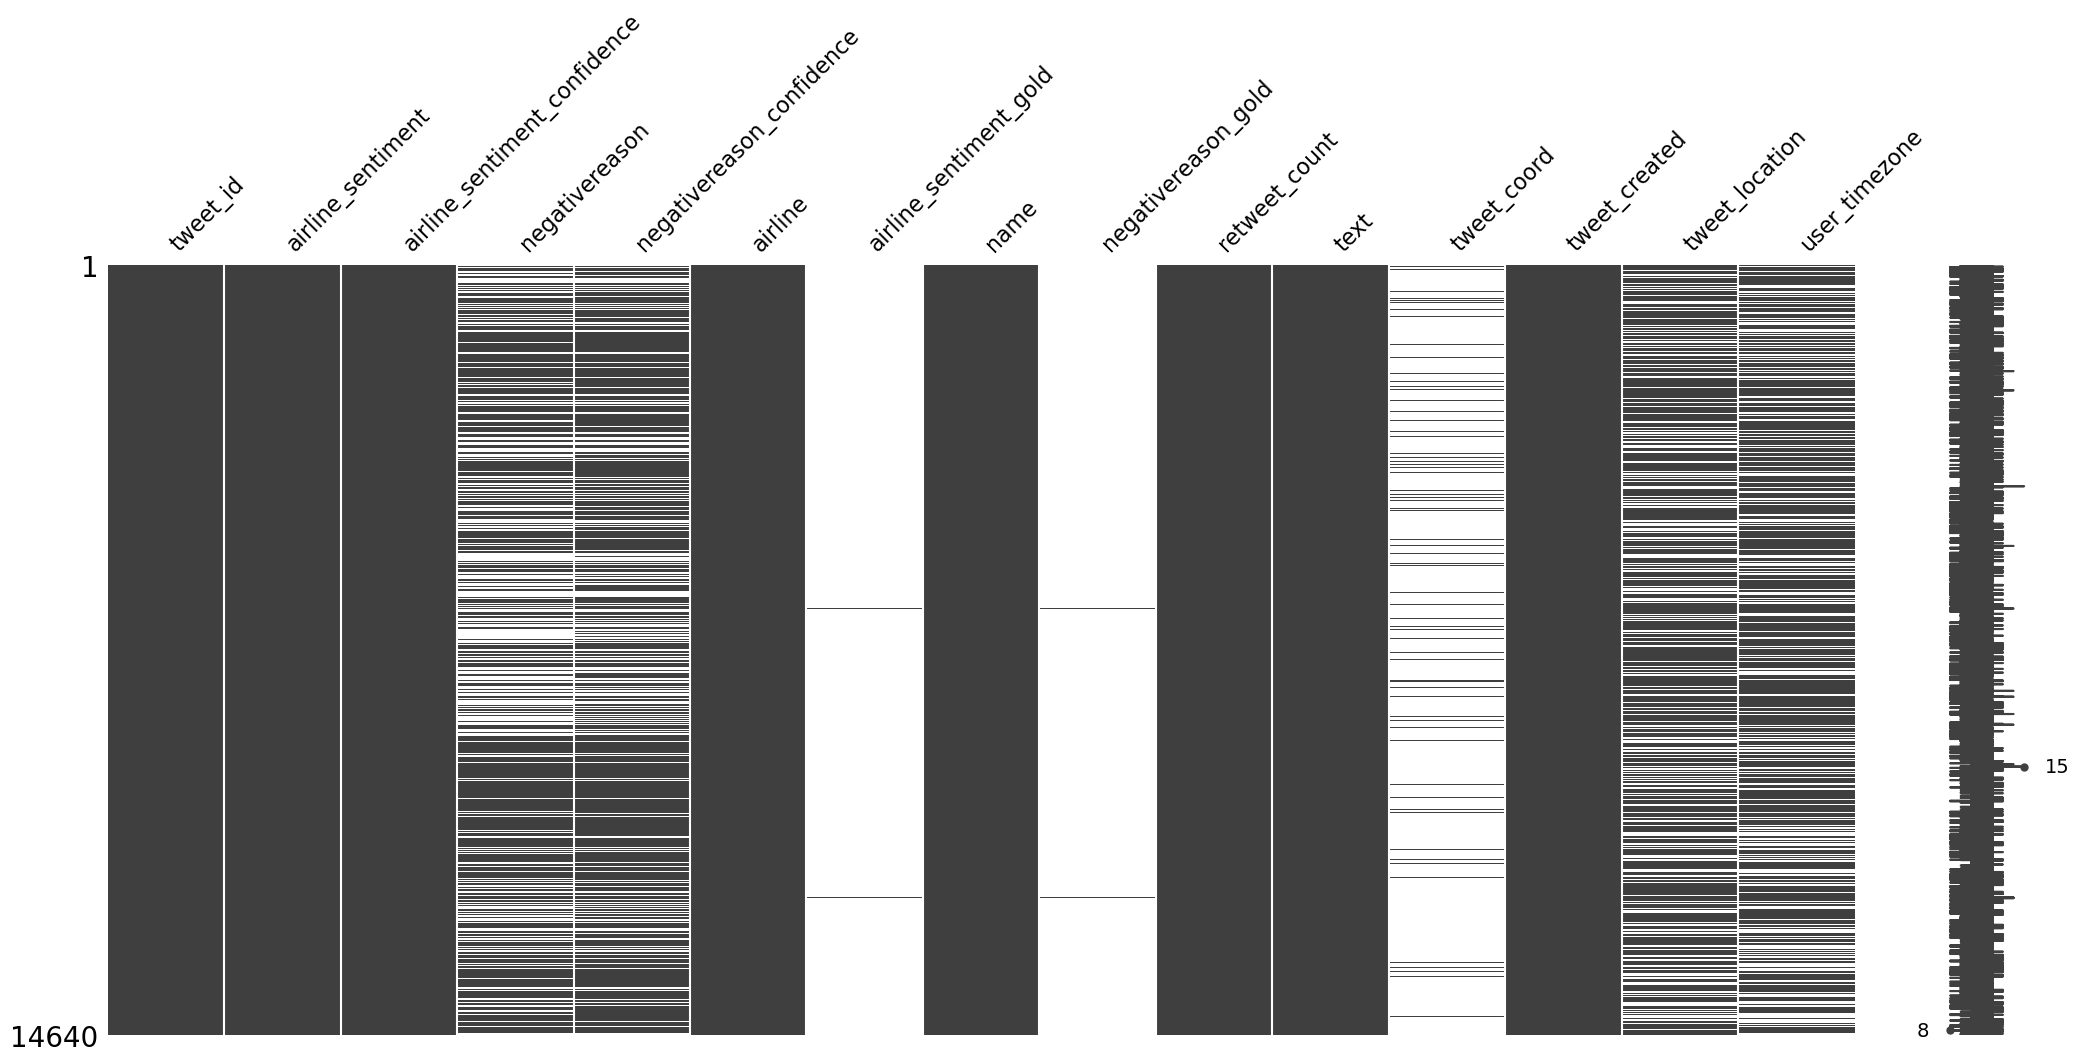

In [61]:
msno.matrix(df)

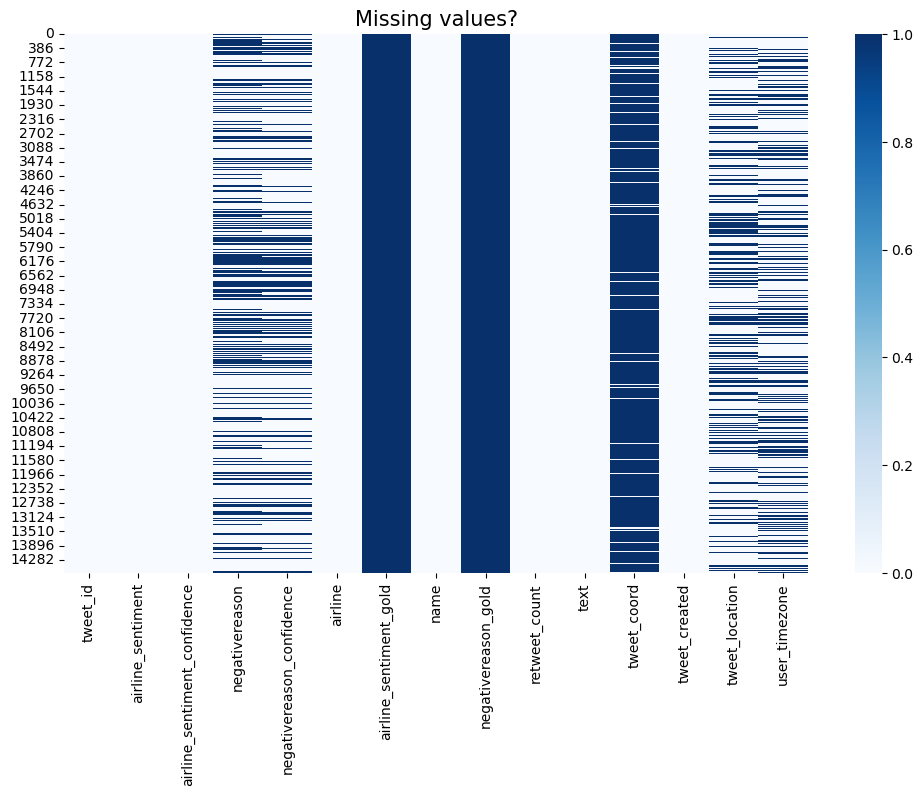

In [62]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

**Interestingly, the only non-null values of the _gold columns seems to be the same entries for the most part. Meanwhile, there is some but not total overlap between location and timezone in terms of missing values.**

In [63]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**airline_sentiment_gold, negativereason_gold** have more than 99% missing data And **tweet_coord** have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [64]:
del df["tweet_coord"]
del df["airline_sentiment_gold"]
del df["negativereason_gold"]

In [65]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [66]:
freq = df.groupby("negativereason").size()

**we can't fill it will affect in bad way for example we have positive reviwe and we fill the values with mode that means with Customer Service Issue it is missmatch and can be affect on train model so we keep the data as it is.**

In [67]:
# Checking duplicates
df.duplicated().sum()

39

In [68]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [69]:
df.duplicated().sum()

0

In [70]:
df.sample(n = 10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
11758,567777100112101376,positive,1.0000,NaN,NaN,US Airways,davidniu7,0,@USAirways right on. Up. Up &amp; away ✈️🌞,2015-02-17 12:06:24 -0800,"Philadelphia, PA",Quito
13774,569719693780496384,negative,1.0000,Bad Flight,0.6952,American,breakthemark,0,@AmericanAir Weather was not involved.,2015-02-22 20:45:34 -0800,"Portland, OR",Pacific Time (US & Canada)
173,569369239183872000,negative,1.0000,Can't Tell,0.6630,Virgin America,Boards707,0,"@VirginAmerica congrats, you just got all my b...",2015-02-21 21:32:59 -0800,"Belmar, NJ",Eastern Time (US & Canada)
9564,569873968175259650,negative,1.0000,Customer Service Issue,0.6800,US Airways,jamescav25,0,@USAirways already spent 60 mins today handlin...,2015-02-23 06:58:36 -0800,"Des Moines, IA",NaN
11384,568155954484797442,positive,1.0000,NaN,NaN,US Airways,CSquieri,0,@USAirways thanks to Betty working gate at ILM...,2015-02-18 13:11:50 -0800,"Mesa, AZ\n",Arizona
10793,568870841120731138,neutral,1.0000,NaN,NaN,US Airways,Shroomcam,0,@USAirways can u tell me if 5238 from clt to J...,2015-02-20 12:32:32 -0800,Orlando,NaN
4050,567850537716092928,positive,0.6857,NaN,0.0000,United,jtor0713,0,@united - I think she was having a rough momen...,2015-02-17 16:58:13 -0800,New York,Atlantic Time (Canada)
3607,568237611208318976,neutral,0.6570,NaN,0.0000,United,doug_kurtz,0,@United should find a way to distinguish board...,2015-02-18 18:36:18 -0800,"Dallas, TX",Mountain Time (US & Canada)
995,569970938525016065,negative,1.0000,Late Flight,0.7065,United,tbird12lv,0,@united by the time I finally get to Dallas I ...,2015-02-23 13:23:55 -0800,Colorado,Mountain Time (US & Canada)
13314,569891369390632961,negative,1.0000,Customer Service Issue,0.6411,American,sindhurella67,0,"@AmericanAir I tried to check in, but they red...",2015-02-23 08:07:45 -0800,NaN,Eastern Time (US & Canada)


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14601.0,5.692156e+17,7.782706e+14,5.675883e+17,5.685581e+17,5.694720e+17,5.698884e+17,5.703106e+17
airline_sentiment_confidence,14601.0,8.999022e-01,1.629654e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10501.0,6.375749e-01,3.303735e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14601.0,8.280255e-02,7.467231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


## EDA

In [72]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             7701
retweet_count                      18
text                            14427
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

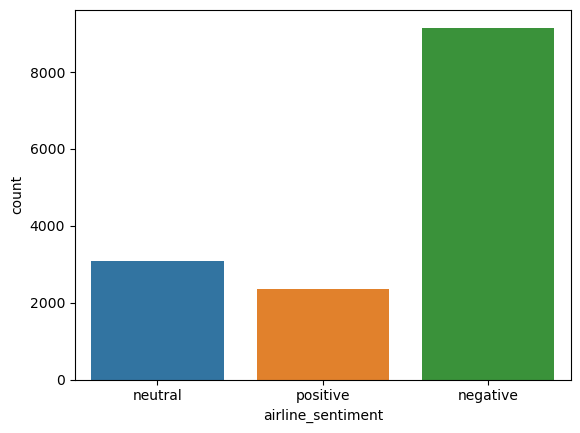

In [73]:
ax = sns.countplot(x = "airline_sentiment", data = df)

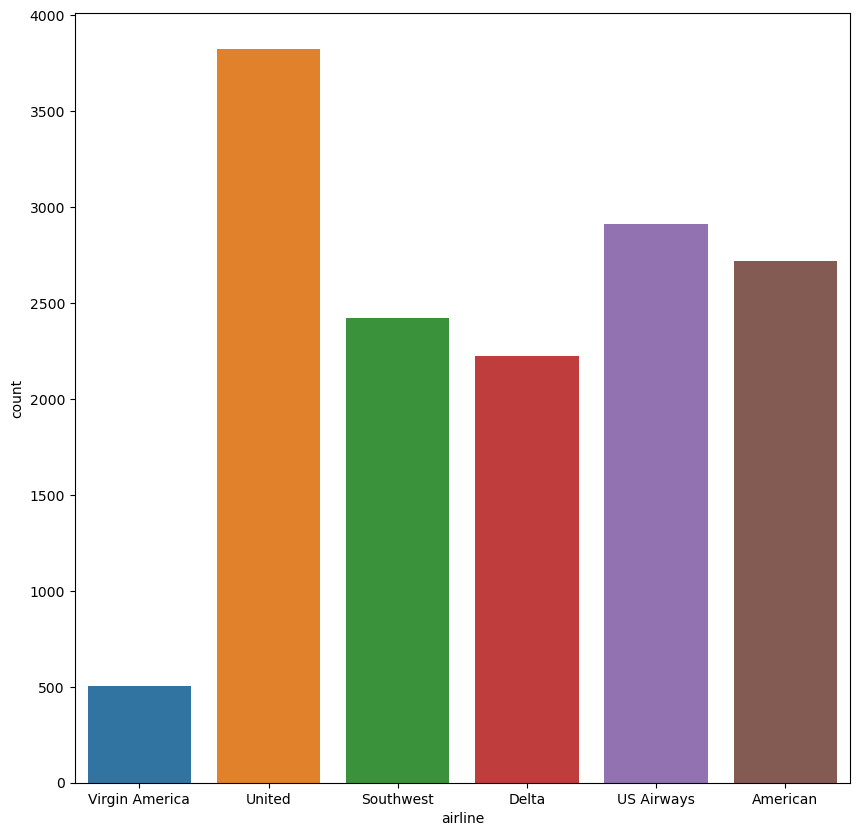

In [74]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "airline", data = df)

## **Stacked bar chart to show the distribution of reviews per company**

In [75]:
import plotly.graph_objects as go
crosstab_sentiments=pd.crosstab(df.airline, df.airline_sentiment)
companies=list(crosstab_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_sentiments[col_name]))
for col_name in list(crosstab_sentiments.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Sentiment distribution per company',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

## **Stacked bar chart to show negative reasons distributions per company**

In [76]:
crosstab_neg_reasons = pd.crosstab(df["airline"], df["negativereason"])
companies = list(crosstab_neg_reasons.index)

fig = go.Figure(data = [
    go.Bar(name = col_name, x = companies, y = list(crosstab_neg_reasons[col_name]))
for col_name in list(crosstab_neg_reasons.columns)])

fig.update_layout(barmode = "stack",
                 title = "Negative Reasons Distribution per Company",
                 yaxis = dict(title = "Negative reasons Distribution"),
                 xaxis = dict(title = "Companies"))
fig.show()

## **Pie plot to check the overall distribution for negative reasons**

In [77]:
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

In [78]:
df.drop(df.loc[df["airline_sentiment"] == "neutral"].index, inplace = True)

## Vectorization Process

In [79]:
data = df[
    ["airline_sentiment", "text"]
]
data.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [80]:
X = df["text"]
y = df["airline_sentiment"]

In [81]:
X

1        @VirginAmerica plus you've added commercials t...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 11510, dtype: object

In [82]:
y

1        positive
3        negative
4        negative
5        negative
6        positive
           ...   
14633    negative
14634    negative
14635    positive
14636    negative
14638    negative
Name: airline_sentiment, Length: 11510, dtype: object

In [95]:
data[data["airline_sentiment"] == "negative"]["text"]

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 9157, dtype: object

In [96]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(data[data["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names_out(), neg_matrix.sum(axis=0).tolist()[0])
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2937), ('united', 2899), ('usairways', 2375), ('americanair', 2089), ('southwestair', 1214), ('jetblue', 1051), ('cancelled', 921), ('service', 746), ('hours', 646), ('just', 622), ('help', 618), ('hold', 611), ('customer', 609), ('time', 596), ('plane', 530), ('delayed', 505), ('amp', 503), ('hour', 452), ('flightled', 445), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('ve', 398), ('don', 388), ('late', 377), ('need', 373), ('phone', 367), ('waiting', 341), ('thanks', 315), ('got', 298), ('airline', 294), ('like', 291), ('trying', 288), ('delay', 272), ('wait', 272), ('today', 269), ('minutes', 266), ('day', 251), ('going', 249), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 242), ('worst', 241), ('fly', 237), ('really', 236), ('did', 227), ('guys', 224), ('weather', 224), ('lost', 221), ('agent', 218), ('hrs', 217), ('way', 212), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

## Wordcloud for Positive Reasons

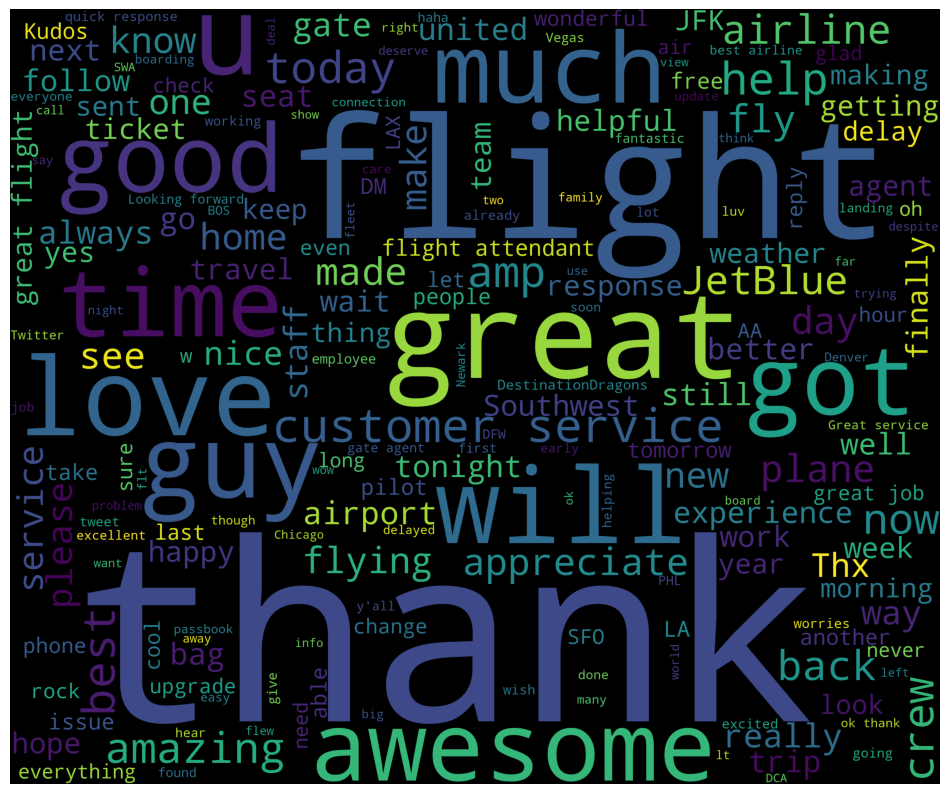

In [97]:
new_df = data[data["airline_sentiment"] == "positive"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Wordcloud for Negative Reasons

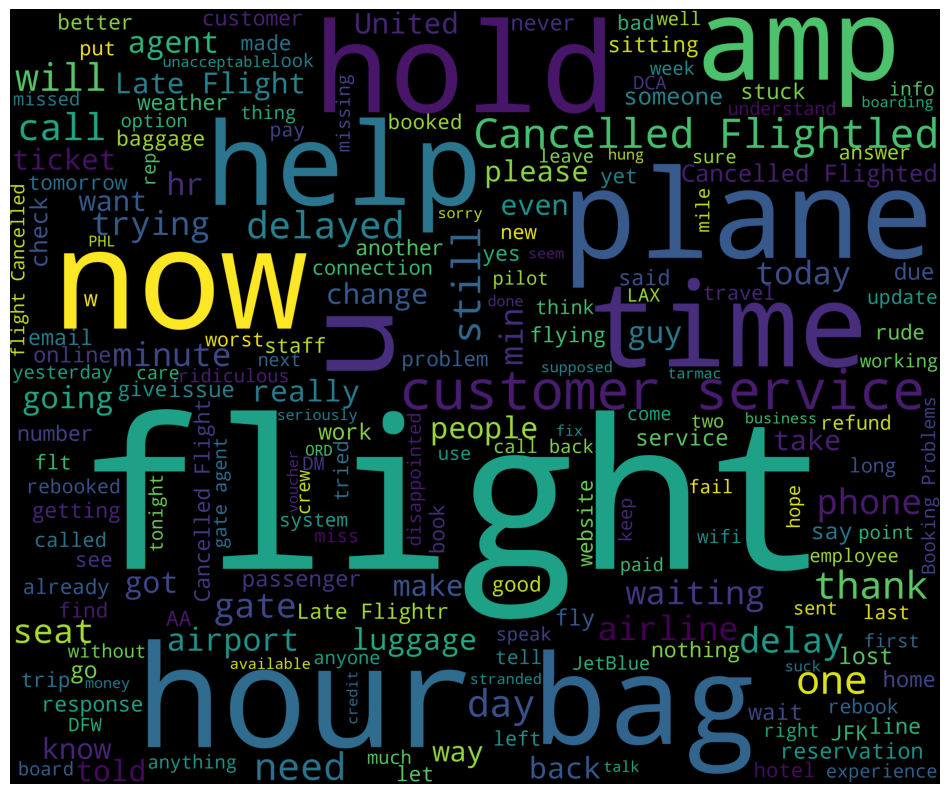

In [93]:
new_df = data[data["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Conclusions

* **As we you can see above we have WordCloud for negative sentiments and postive sentiments.
* **The positive sentiments are love,great,thank,amazing,good,...,etc.
* **The negative sentiments are flight,need,bag,left,customer service,help,plane,..,etc.


# Thank you!